In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
from sklearn.metrics import adjusted_rand_score
from scipy.stats import rankdata
import itertools

In [3]:
from pygraphs.cluster import KernelKMeans, Ward, KernelKMeansSklearn, KernelWardSklearn
from pygraphs.graphs.generator import StochasticBlockModel, RubanovModel
from pygraphs.measure import *
from pygraphs.measure import H_kernels_plus_RSP_FE_SP_CT, scaler
from pygraphs.scenario import plot_results, d3_right_order, measures_right_order, ParallelByGraphs
from pygraphs.scorer import rand_index

# Вот любопытный пример, правда, с равными частотами внутри и вне

In [4]:
nodes = [0, 0, 0, 0, 1, 1, 1, 1]
a, b, c, d, A, B, C, D = range(8)
edges = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
])

def set1(edges, e1, e2):
    edges[e1][e2] = 1
    edges[e2][e1] = 1
    
set1(edges, a, B)
set1(edges, a, D)
set1(edges, b, A)
set1(edges, b, C)
set1(edges, c, B)
set1(edges, c, D)
set1(edges, d, A)
set1(edges, d, C)
edges

array([[0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0]])

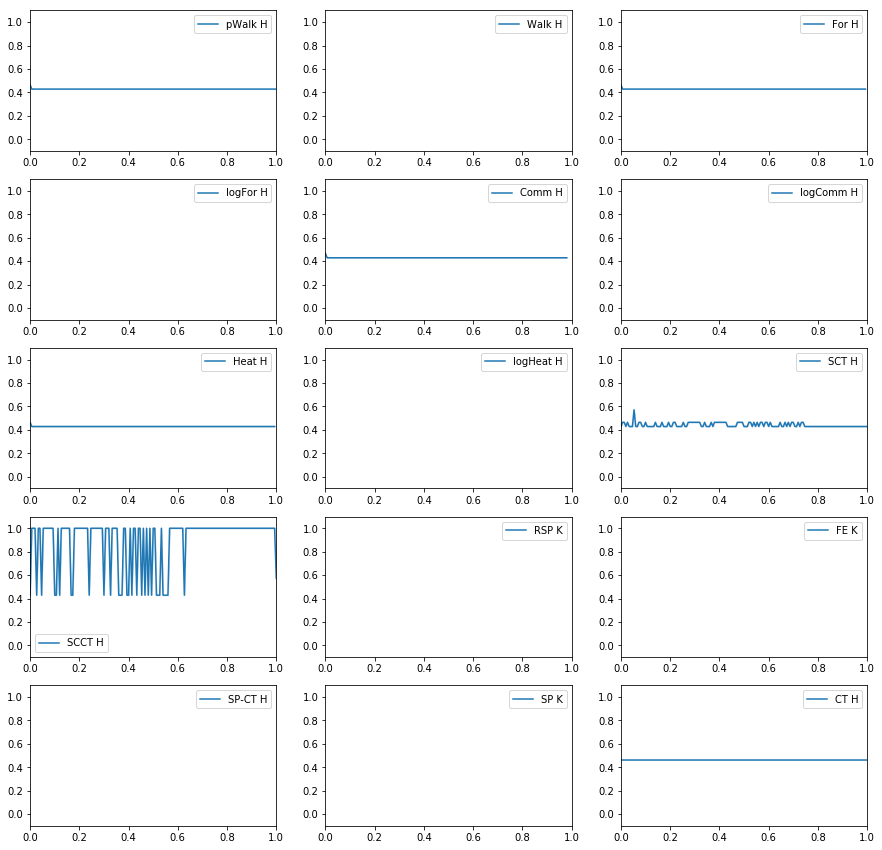

In [5]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
results = defaultdict(list)
classic_plot = ParallelByGraphs(rand_index, np.linspace(0, 1, 151), progressbar=False)
for idx, measure_class in enumerate(tqdm(H_kernels_plus_RSP_FE_SP_CT)):
    results[measure_class.name] = classic_plot.perform(KernelKMeansSklearn, measure_class, [(edges, nodes)], 2, n_jobs=1)
    plot_results(ax[idx // 3][idx % 3], [(measure_class.name, *results[measure_class.name])], ylim=(-0.1, 1.1))

In [6]:
set1(edges, a, b)
set1(edges, b, c)
set1(edges, c, d)
set1(edges, A, B)
set1(edges, B, C)
set1(edges, C, D)
edges

array([[0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0]])

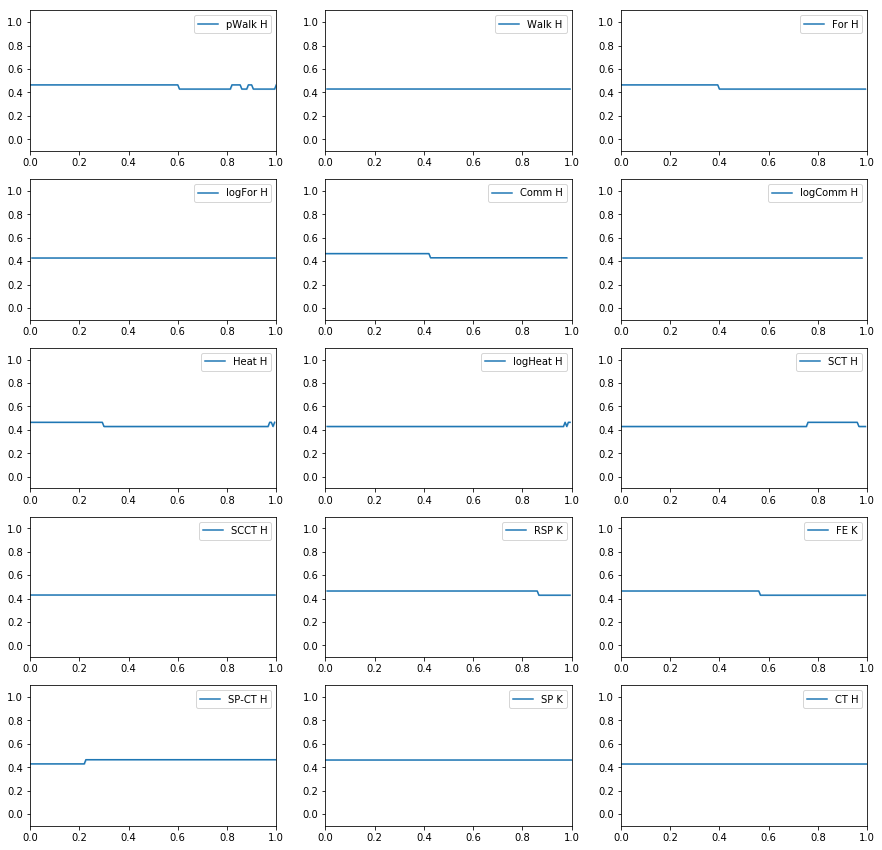

In [7]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
results = defaultdict(list)
classic_plot = ParallelByGraphs(rand_index, np.linspace(0, 1, 151), progressbar=False)
for idx, measure_class in enumerate(tqdm(H_kernels_plus_RSP_FE_SP_CT)):
    results[measure_class.name] = classic_plot.perform(KernelKMeansSklearn, measure_class, [(edges, nodes)], 2, n_jobs=1)
    plot_results(ax[idx // 3][idx % 3], [(measure_class.name, *results[measure_class.name])], ylim=(-0.1, 1.1))